1. Perkenalan Dataset

Dataset ini berasal dari UCI Machine Learning Repository. 
Link Dataset: [Heart Disease Dataset - UCI.](https://archive.ics.uci.edu/dataset/45/heart+disease) 
Dataset ini berisi hasil pemeriksaan medis pasien untuk mendeteksi penyakit jantung. Atribut target adalah num yang menunjukkan tingkat keparahan (0 untuk sehat, 1-4 untuk sakit). Subset 14 atribut utama digunakan untuk analisis ini, termasuk usia, tekanan darah, dan kolesterol.

2. Import Library

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

3. Memuat Dataset

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [107]:
# Memuat dataset dari folder raw
df = pd.read_csv('../heart_disease_uci_raw/heart_disease_uci.csv')

# Menampilkan 5 baris pertama
print(df.head())

# Menampilkan informasi dasar dataset
print(df.info())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

4. Exploratory Data Analysis (EDA)

Pada tahap ini, Anda akan melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [108]:
# Cek data kosong
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20272\3539077009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='magma')


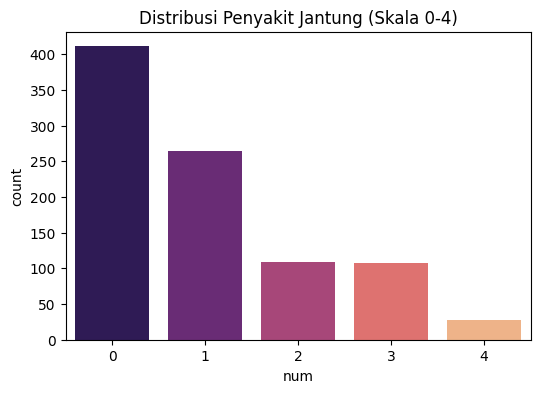

Insight: Target num menunjukkan tingkat keparahan. Skala ini akan digabung menjadi biner (0 vs 1).


In [109]:
#Distribusi Target 
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df, palette='magma')
plt.title('Distribusi Penyakit Jantung (Skala 0-4)')
plt.show()
print("Insight: Target num menunjukkan tingkat keparahan. Skala ini akan digabung menjadi biner (0 vs 1).")

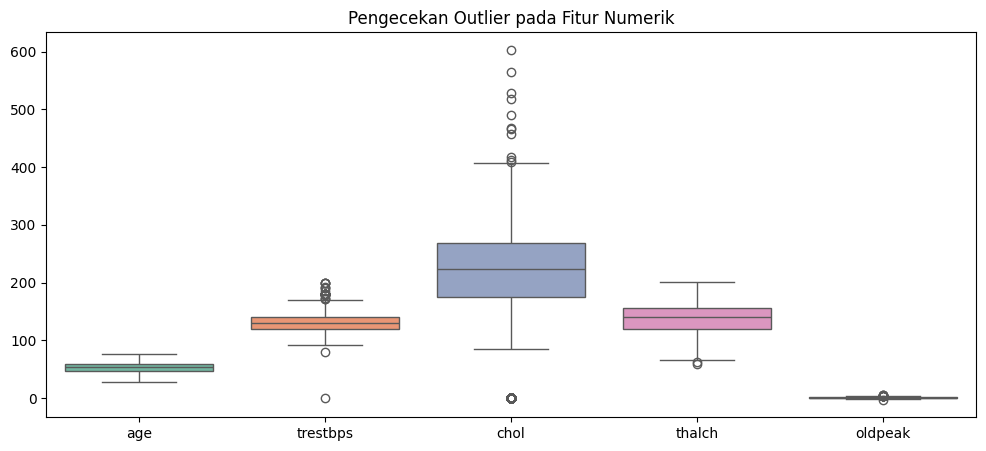

Insight: Terdapat outlier pada kolesterol (chol), namun nilai tetap dipertahankan karena valid secara medis.


In [110]:
# Deteksi Outlier 
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.title('Pengecekan Outlier pada Fitur Numerik')
plt.show()
print("Insight: Terdapat outlier pada kolesterol (chol), namun nilai tetap dipertahankan karena valid secara medis.")

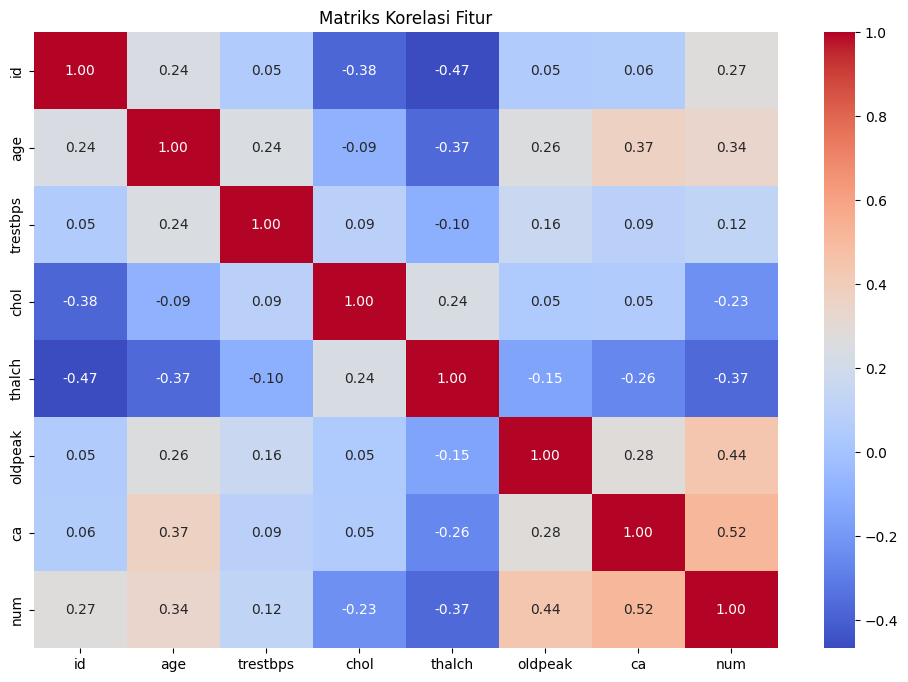

In [111]:
# Heatmap Korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()


Fitur 'thalch' dan 'oldpeak' menunjukkan korelasi yang cukup kuat dengan variabel target, sehingga menjadi fitur penting dalam prediksi.

In [112]:
# Cek Data Kosong
print("Jumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())

Jumlah Nilai Kosong per Kolom:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


5. Data Preprocessing

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi tidak terbatas pada:

1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)
Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [113]:
# 1. Menangani missing values 
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20272\625653887.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [114]:
# 2. Target Engineering (Mengubah ke 0 dan 1)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [115]:
# 3. Encoding
df_clean = pd.get_dummies(df, drop_first=True)

In [116]:
# 4. Validasi Output
print(f"Ukuran data sekarang: {df_clean.shape[0]} baris & {df_clean.shape[1]} kolom")
if df_clean.isnull().sum().sum() == 0:
    print("✔ STATUS: Sukses! Tidak ada lagi data yang kosong.")
else:
    print("❌ STATUS: Masih ada data kosong.")

# Menampilkan tabel hasil akhir
display(df_clean.head())

Ukuran data sekarang: 920 baris & 23 kolom
✔ STATUS: Sukses! Tidak ada lagi data yang kosong.


,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,True,150.0,False,2.3,0.0,0,...,False,False,False,True,False,False,False,False,False,False
1,2,67,160.0,286.0,False,108.0,True,1.5,3.0,1,...,False,False,False,False,False,False,True,False,True,False
2,3,67,120.0,229.0,False,129.0,True,2.6,2.0,1,...,False,False,False,False,False,False,True,False,False,True
3,4,37,130.0,250.0,False,187.0,False,3.5,0.0,0,...,False,False,True,False,True,False,False,False,True,False
4,5,41,130.0,204.0,False,172.0,False,1.4,0.0,0,...,False,True,False,False,False,False,False,True,True,False


In [119]:
# 5. Menyimpan Hasil ke CSV 
output_dir = 'heart_disease_preprocessing'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df_clean.to_csv(f"{output_dir}/heart_disease_clean.csv", index=False)

print(f"✅ File berhasil disimpan di: {output_dir}/heart_disease_clean.csv")

✅ File berhasil disimpan di: heart_disease_preprocessing/heart_disease_clean.csv
